<a href="https://colab.research.google.com/github/Suchitra-V31/Machine-learning-projects/blob/main/BigMart_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BigMart Sales Data**


In [72]:
#let's import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
#get the data
big_data=pd.read_csv('/content/Big data -Train.csv')
big_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [74]:
#lets try to get some information from the data

In [75]:
big_data.shape

(8523, 12)

In [76]:
big_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [77]:
big_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [78]:
big_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Exploratory Data Analysis**

In [79]:
#let's find out the missing values
big_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

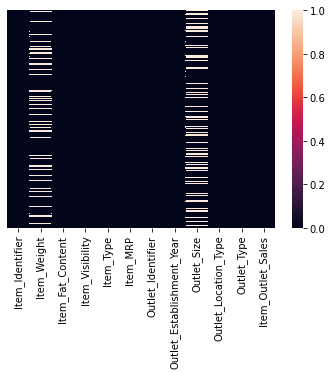

In [80]:
sns.heatmap(big_data.isnull(),yticklabels=False)

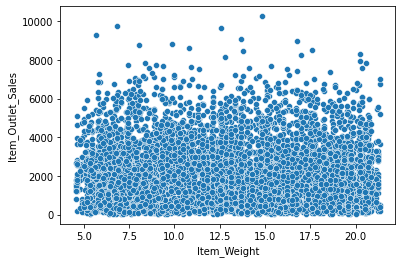

In [81]:
#let's plot the relationship b/w nan value and dependent value
sns.scatterplot(x=big_data['Item_Weight'],y=big_data['Item_Outlet_Sales'])

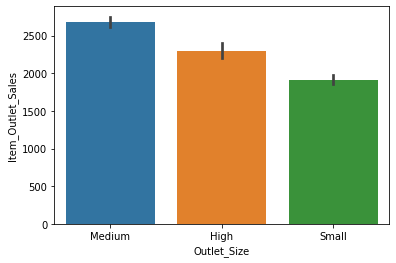

In [82]:
sns.barplot(x=big_data['Outlet_Size'],y=big_data['Item_Outlet_Sales'])

In [83]:
#let's get the numerical features
num_data=[feature for feature in big_data.columns if big_data[feature].dtype!='O']
print('Total no.of numerical values are: ',len(num_data))
big_data[num_data].head()

Total no.of numerical values are:  5


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [84]:
# list of variables that contain year information
year_feature = [feature for feature in num_data if 'Yr' in feature or 'Year' in feature]

year_feature

['Outlet_Establishment_Year']

In [85]:
big_data['Outlet_Establishment_Year'].unique()


array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

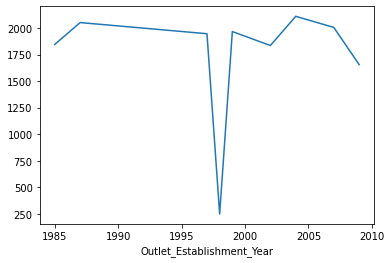

In [86]:
big_data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].median().plot()

In [87]:
## Numerical variables are usually of 2 types
## 1. Continous variable and Discrete Variables

discrete_data=[feature for feature in num_data if len(big_data[feature].unique())<25 and feature not in year_feature]
print("Discrete Variables Count: {}".format(len(discrete_data)))

Discrete Variables Count: 0


In [88]:
continuous_data=[feature for feature in num_data if feature not in discrete_data and feature not in year_feature]
print("Continuous Variable Count : ",len(continuous_data))

Continuous Variable Count :  4


In [89]:
big_data[continuous_data].head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.30,0.016047,249.8092,3735.1380
1,5.92,0.019278,48.2692,443.4228
2,17.50,0.016760,141.6180,2097.2700
3,19.20,0.000000,182.0950,732.3800
4,8.93,0.000000,53.8614,994.7052


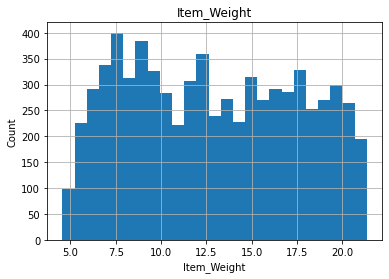

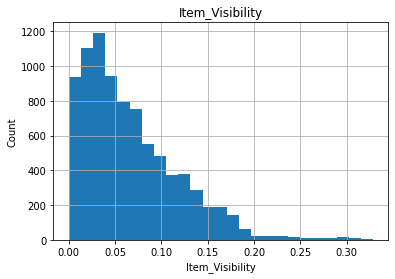

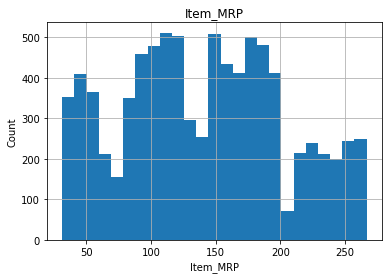

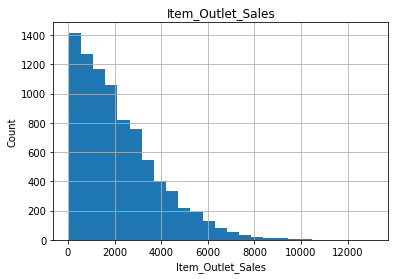

In [90]:
#let's visualize the continuous feature
for feature in continuous_data:
    data=big_data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


**Categorical Features**

In [91]:
cat_data=[feature for feature in big_data.columns if big_data[feature].dtype=='O']
print("Total no of Categorical data are : ",len(cat_data))
big_data[cat_data].head()

Total no of Categorical data are :  7


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [92]:
for feature in cat_data:
  print('Feature: {} , No.of categories: {}'.format(feature,len(big_data[feature].unique())))

Feature: Item_Identifier , No.of categories: 1559
Feature: Item_Fat_Content , No.of categories: 5
Feature: Item_Type , No.of categories: 16
Feature: Outlet_Identifier , No.of categories: 10
Feature: Outlet_Size , No.of categories: 4
Feature: Outlet_Location_Type , No.of categories: 3
Feature: Outlet_Type , No.of categories: 4


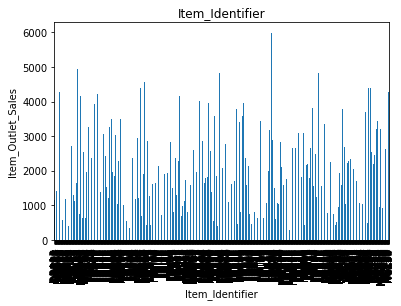

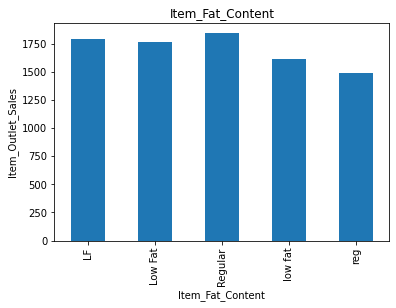

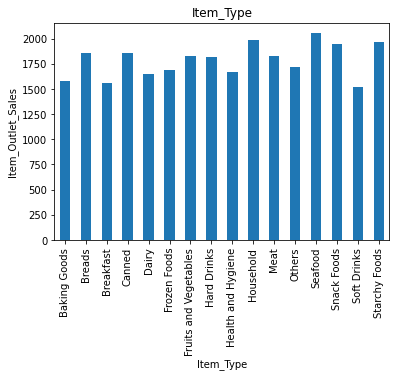

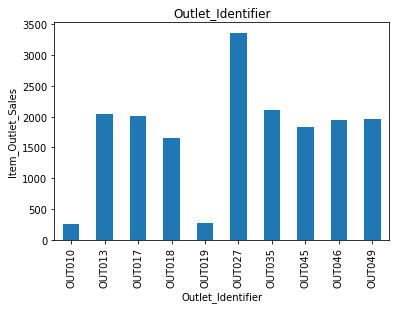

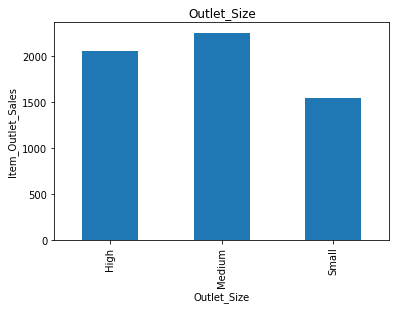

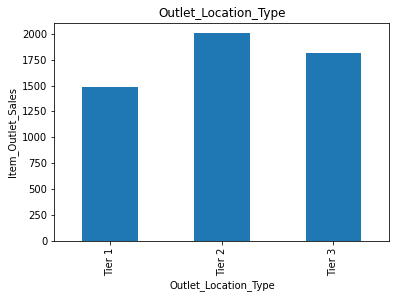

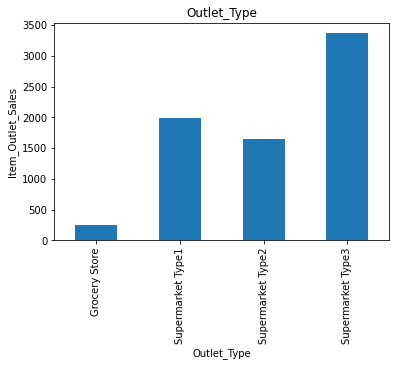

In [93]:
#let's plot the relationship b/w cat_data and dependent feature
for feature in cat_data:
  data1=big_data.copy()
  data1.groupby(feature)['Item_Outlet_Sales'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('Item_Outlet_Sales')
  plt.title(feature)
  plt.show()

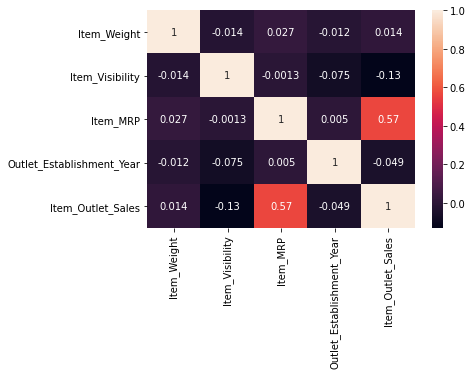

In [98]:
#let us find the correlation b/w each feature
sns.heatmap(big_data.corr(),annot=True)

From this we can see that almost all the values are not corelated to each other.

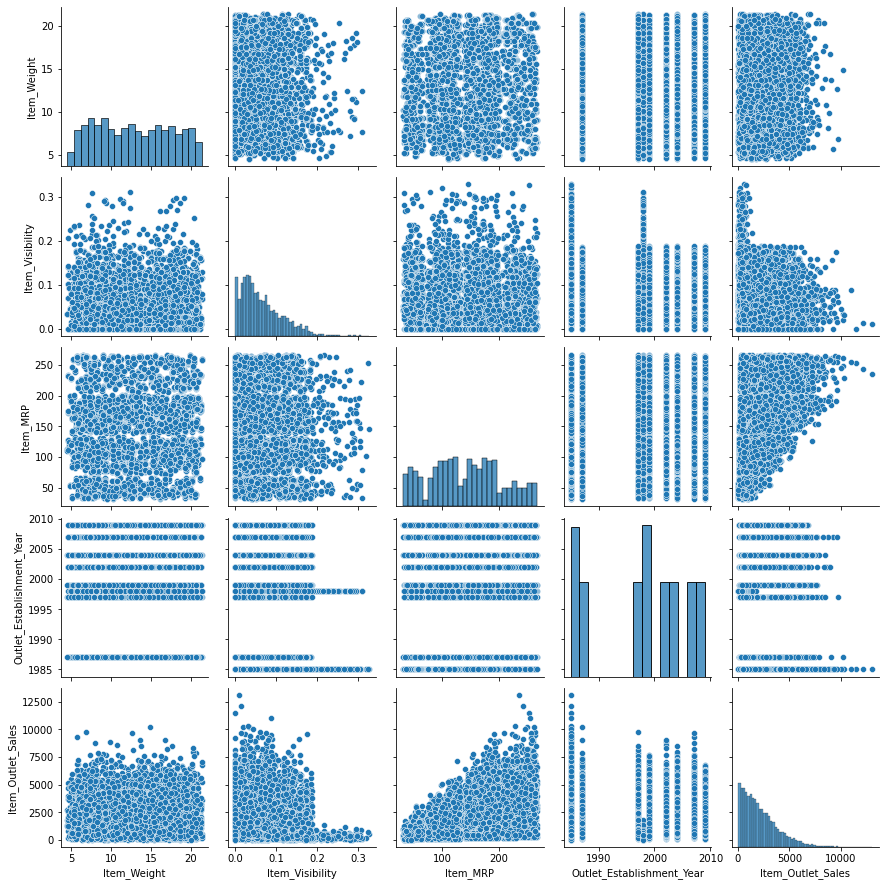

In [99]:
# let us visualize using pairplot
sns.pairplot(big_data)

**Feature Engineering**

In [21]:
#Handling missing values
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in big_data.columns if big_data[feature].isnull().sum()>1 and big_data[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(big_data[feature].isnull().mean(),4)))

Item_Weight: 0.1717% missing value


In [100]:
#let's replace them with its mean
big_data['Item_Weight']=big_data['Item_Weight'].fillna(big_data['Item_Weight'].mean())

In [23]:
big_data['Item_Weight'].isnull().sum()

0

In [103]:
#replace the nan value with mode
mode_of_Outlet_size = big_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [104]:
miss_values = big_data['Outlet_Size'].isnull()   

In [105]:
big_data.loc[miss_values, 'Outlet_Size'] = big_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

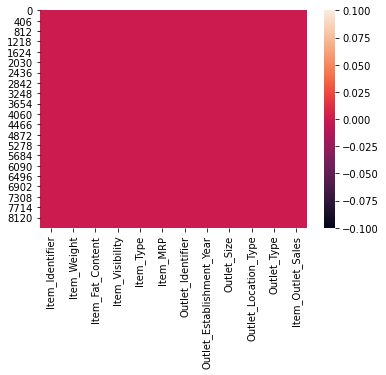

In [106]:
sns.heatmap(big_data.isnull())

Now we have replaced all the missing values and there is no nan values present in the data

**Let's standardize the numerical values using MinMaxScaler**



In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler=MinMaxScaler()

In [27]:
scaled_features=scaler.fit_transform(big_data[continuous_data])

In [28]:
scaled_data=pd.DataFrame(scaled_features,columns=big_data[continuous_data].columns)

In [29]:
scaled_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,0.282525,0.048866,0.927507,0.283587
1,0.081274,0.058705,0.072068,0.031419
2,0.770765,0.051037,0.468288,0.158115
3,0.871986,0.000000,0.640093,0.053555
4,0.260494,0.000000,0.095805,0.073651


**Handling Categorical values using LabelEncoder**

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
encoder = LabelEncoder()

In [35]:
big_data['Item_Identifier'] = encoder.fit_transform(big_data['Item_Identifier'])

big_data['Item_Fat_Content'] = encoder.fit_transform(big_data['Item_Fat_Content'])

big_data['Item_Type'] = encoder.fit_transform(big_data['Item_Type'])

big_data['Outlet_Identifier'] = encoder.fit_transform(big_data['Outlet_Identifier'])

big_data['Outlet_Size'] = encoder.fit_transform(big_data['Outlet_Size'])

big_data['Outlet_Location_Type'] = encoder.fit_transform(big_data['Outlet_Location_Type'])

big_data['Outlet_Type'] = encoder.fit_transform(big_data['Outlet_Type'])

In [36]:
big_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


We have handled all our features and now we can conactenate all the standardized features in a new dataframe.

In [37]:
big_data[continuous_data].columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

In [38]:
big_data.drop(columns=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'],axis=1,inplace=True)

In [42]:
final_data=pd.concat([big_data,scaled_data],axis=1)

In [44]:
final_data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,156,1,4,9,1999,1,0,1,0.282525,0.048866,0.927507,0.283587
1,8,2,14,3,2009,1,2,2,0.081274,0.058705,0.072068,0.031419
2,662,1,10,9,1999,1,0,1,0.770765,0.051037,0.468288,0.158115
3,1121,2,6,0,1998,2,2,0,0.871986,0.000000,0.640093,0.053555
4,1297,1,9,1,1987,0,2,1,0.260494,0.000000,0.095805,0.073651


Our data is ready...let us train our data

In [45]:
from sklearn.model_selection import train_test_split

In [49]:
X=final_data.drop('Item_Outlet_Sales',axis=1)
y=final_data['Item_Outlet_Sales']

In [50]:
from sklearn.linear_model import SGDRegressor

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.03,random_state=42)

**Using Stochastic Gradient Descent**

In [52]:
sgd=SGDRegressor(max_iter=1000,penalty=None,eta0=0.001)

In [53]:
model=sgd.fit(X_train,y_train)

In [54]:
y_pred=model.predict(X_test)

In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [57]:
print('MSE: ',mean_squared_error(y_pred,y_test))

MSE:  3.547417470936013e+27


**Using Random Forest Regressor**

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
rf=RandomForestRegressor()

model = rf.fit(X_train,y_train)

In [60]:
y_pred=model.predict(X_test)

In [62]:
print('MSE: ',mean_squared_error(y_pred,y_test))
print('MAE: ',mean_absolute_error(y_pred,y_test))

MSE:  0.006773771158913472
MAE:  0.05810081776357086


In [63]:
from sklearn.tree import DecisionTreeRegressor
d_tree=DecisionTreeRegressor()
model=d_tree.fit(X_train,y_train)


In [64]:
predict=d_tree.predict(X_test)

In [65]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,predict))
print(mean_squared_error(y_test,predict))
print(np.sqrt(mean_squared_error(y_test,predict)))

0.07644453148908498
0.011309417367739227
0.10634574447404667


We can see that Random forest Regressor performs better than SGD Regressor

**Using XGboost**

In [66]:
import xgboost as xgb


In [67]:
xg_boost=xgb.XGBRegressor()

In [68]:
model_1=xg_boost.fit(X_train,y_train)

[08:48:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [69]:
predict_1=model_1.predict(X_test)

In [70]:
print(metrics.mean_absolute_error(y_test,predict_1))
print(mean_squared_error(y_test,predict_1))
print(np.sqrt(mean_squared_error(y_test,predict_1)))

0.05539737242687206
0.006031931660563424
0.0776655113970379


XGBoost Regressor performs much better than Random Forest Regressor